# Suomen 1. ja 2. lintuatlaksen tulokset

Tuodaan sisään tilastojen käsittelyä helpottavat moduulit.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

Lajit-taulukko sisältää lajien nimet erikielillä, sekä lyhenteen jota käytetään muissa taulukoissa.

In [21]:
lajit_header=["lyhenne","latina","suomi","ruotsi","englanti","julkisuus"]
lajit=pd.read_csv('./data/lajit.csv', encoding='iso8859_10',names=lajit_header)
lajit.head()

,lyhenne,latina,suomi,ruotsi,englanti,julkisuus
0,CYGOLO,Cygnus olor,Kyhmyjoutsen,Knölsvan,Mute Swan,1
1,CYGCYG,Cygnus cygnus,Laulujoutsen,Sångsvan,Whooper Swan,1
2,ANSFAB,Anser fabalis,Metsähanhi,Sädgås,Bean Goose,1
3,ANSERY,Anser erythropus,Kiljuhanhi,Fjällgås,Lesser White-fronted Goose,0
4,ANSANS,Anser anser,Merihanhi,Grågås,Greylag Goose,1


Ruudut-taulukossa on ruutujen koordinaatit pohjois (P) ja itä (E) suunnissa, sekä ruudun selvitys asteet asteikolla 0-5 (0 -> "ei havaintoja", 5 -> "erinomaiset havainnot"). 1. Atlas v1974-79 ja 2. atlas v1986-89.

In [23]:
ruudut_header=["N-koord","E-koord","aste-1.atlas","aste-2.atlas","yhdistetty"]
ruudut=pd.read_csv('./data/ruudut.csv',header=None, names=ruudut_header)
ruudut.head()

,N-koord,E-koord,aste-1.atlas,aste-2.atlas,yhdistetty
0,663,318,2,3,3
1,663,319,2,2,3
2,663,320,1,2,2
3,663,321,4,4,4
4,663,322,4,4,5


Havainnot-taulukossa on lajien lyhenteet, ruutujen koordinaatit P ja E, sekä pesimisluokat arvoilla 0-4 atlaksittain (0->"ei havaintoa, 4->"varma pesintä").

In [24]:
havainnot_header=["lyhenne","N-koord","E-koord","pesiminen-1","pesiminen-2","pesiminen-1_2"]
havainnot=pd.read_csv('./data/havainnot.csv',header=None, names=havainnot_header)
havainnot.head()

,lyhenne,N-koord,E-koord,pesiminen-1,pesiminen-2,pesiminen-1_2
0,CYGOLO,663,319,0,4,4
1,CYGOLO,663,320,0,1,1
2,CYGOLO,663,322,4,4,4
3,CYGOLO,663,323,2,3,3
4,CYGOLO,663,324,4,4,4


In [29]:
print(lajit.shape, ruudut.shape, havainnot.shape)

(248, 6) (3813, 5) (316265, 6)


In [143]:
# etsi lyhenne
def lajilyhenne():
    lintu_laji=input("Anna lintulaji: ")
    lintu_laji=lintu_laji.lower().capitalize() #korjaa kirjoitusasu alkamaan isolla kirjaimella
    laji_lyhenne=lajit['lyhenne'].where(lajit['suomi']==lintu_laji)
    laji_lyhenne=laji_lyhenne.dropna()
    if(laji_lyhenne.empty):
        print("Antamaasi lintulajia "+lintu_laji+" ei löydy luettelosta.")
        return ""
    else:
        return laji_lyhenne.iloc[0]

#etsi pesimakartta
def pesimakartta(laji_lyhenne):
    pesima_kartta=havainnot.where(havainnot['lyhenne']==laji_lyhenne)
    pesima_kartta=pesima_kartta.dropna()
    if(pesima_kartta.empty):
        print("Ei havaintoja linnusta.")
    return pesima_kartta

In [144]:

def piirra_kartta(pesima_kartta):
    #diagrammin pohja
    kuva=plt.figure(figsize=(15,15))
    pylvaat=kuva.add_subplot(1,1,1,projection='3d')
    pylvaat.view_init(elev=60.0, azim=300.0)
    pylvaat.set_zlim3d((0,25))

    #parametrit
    x_paikka=pesima_kartta['E-koord']
    y_paikka=pesima_kartta['N-koord']
    z_paikka=np.zeros(len(pesima_kartta))
    palkin_korkeus=pesima_kartta['pesiminen-1_2']
    palkin_leveys= np.full(len(pesima_kartta),1)
    palkin_syvyys= np.full(len(pesima_kartta),1)

    #piirto
    pylvaat.bar3d(x_paikka,y_paikka, z_paikka,palkin_leveys,palkin_syvyys,palkin_korkeus, shade=True)
    plt.show()

Anna lintulaji: Kuukkeli


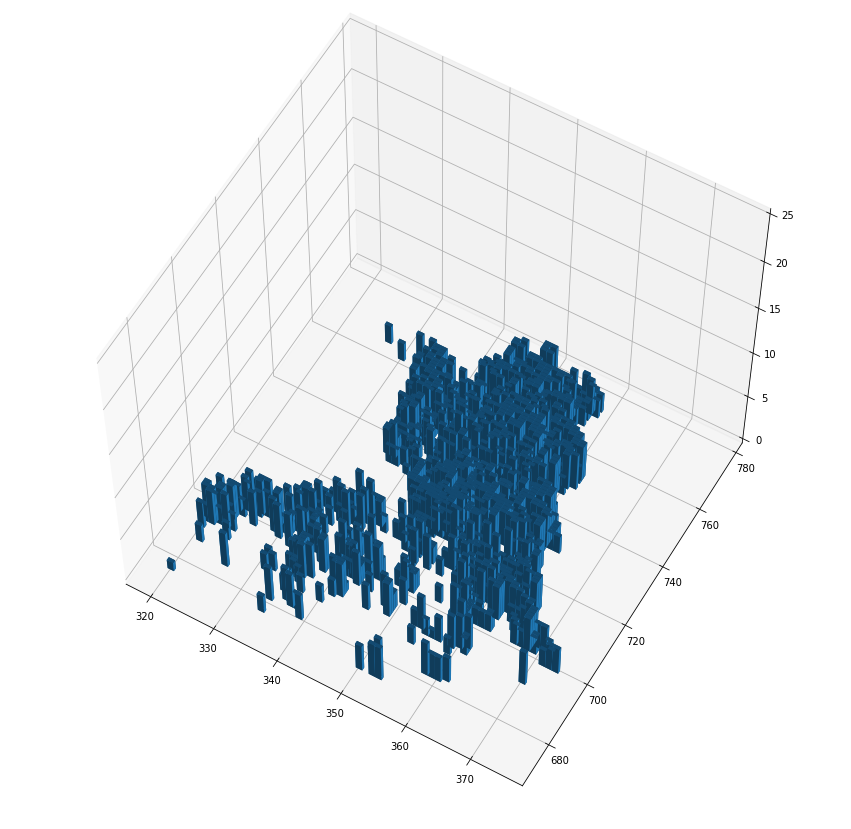

In [148]:
# MAIN:
laji=lajilyhenne()
pesima=pesimakartta(laji)
piirra_kartta(pesima)